In [1]:
# Analysis Library import
import MeCab
import neologdn
import re
import pandas as pd
from functools import reduce

In [2]:
# Visualization Library import & japanese font change(MACのフォットがちょっと上手くいかない)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['font.sans-serif'] = ['AppleGothic']
mpl.rcParams['font.serif'] = ['AppleGothic']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['AppleGothic', 'Arial']})

In [ ]:
# 1.1 日本語前処理

In [4]:
# Mecab + Neologd辞書　確認
neologd_tagger = MeCab.Tagger('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
print(neologd_tagger.parse('庭には二羽鶏がいる'))

庭	ニワ	庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
二羽	ニワ	二羽	名詞-固有名詞-人名-姓		
鶏	ニワトリ	鶏	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
いる	イル	いる	動詞-自立	一段	基本形
EOS



In [5]:
#  形態素解析関数
def word_tokenize(x):
    text = neologd_tagger.parse(x)
    lines = text.split('\n')
    words = []
    for line in lines:
        cols = line.split("\t")
        if cols[0] != 'EOS':
            words.append( cols[0] )
    return words

In [6]:
#  形態素解析関数(名詞だけ取り出す)
def word_tokenize_non(x):
    text = neologd_tagger.parse(x)
    lines = text.split('\n')
    words = []
    for line in lines[0:len(lines)-2]:
        cols = line.split("\t")
        if cols[3].startswith("名詞"):
            words.append(cols[0])
    return words

In [7]:
#関数確認
word_list = word_tokenize_non('庭には二羽鶏がいる')
print(word_list)

['庭', '二羽', '鶏']


In [8]:
#タミフルテキスト（1000件）導入
tamifuru = pd.read_json("/Users/samuel/Desktop/source code/text mining/tamifuru_1904081354.json")

In [9]:
tamifuru = tamifuru.drop(columns = "attinfo") 

In [10]:
#テキストを形態素解析し、新しいコラムに置く
tamifuru["word_tokenize"] = tamifuru.apply(lambda row : word_tokenize_non(str(row["comment"])), axis =1)

In [11]:
tamifuru

,comment,dt,no,type,word_tokenize
0,タミフルと不眠についてインフルエンザA型と診断されて５日分のタミフルを処方され、飲んだ翌日か...,2019/1/6 12:38:24,1,0,"[タミフル, 不眠, インフルエンザA, 型, 診断, ５, 日, 分, タミフル, 処方,..."
1,タミフル・リレンザでは、不眠の副作用がわずかにありえます。せいぜい治療期間は5日くらいなので...,2019/1/6 17:03:51,2,1,"[タミフル・リレンザ, 不眠, 副作用, 治療, 期間, 5日, 外出, 禁止, こと, ほ..."
2,私の子供もインフルエンザA型と診断され、タミフルを処方されましたが、昼間の眠りいつもよりよく...,2019/1/6 13:21:33,3,2,"[私, 子供, インフルエンザA, 型, 診断, タミフル, 処方, 昼間, 眠り, 不眠,..."
3,タミフルの予防投与と他の市販薬の飲み合わせについて職場でインフルエンザのスタッフが大勢出てい...,2019/2/5 14:00:04,4,0,"[タミフル, 予防, 投与, 他, 市販薬, 合わせ, 職場, インフルエンザ, スタッフ,..."
4,ルルアタックＥＸの成分・・・トラネキサム酸・イブプロフェン・クレマスチン・ブロムヘキシン・メ...,2019/2/5 14:43:00,5,1,"[ルル, アタック, 成分, ・・トラネキサム, 酸, イブプロフェン, クレマスチン, ブ..."
5,子供のインフルエンザ発症後のタミフル内服振戦(頭の揺れ、手足のピクツキ)の発生について4歳女...,2019/1/13 23:41:49,6,0,"[子供, インフルエンザ, 発症, 後, タミフル, 内服, 戦, 頭, 揺れ, 手足, ピ..."
6,タミフル 添付文書ここに頻度不明で振戦とあります。泣きわめいていたのが当てはまるのかどうか疑...,2019/1/14 19:46:58,7,1,"[タミフル, 添付文書, ここに, 頻度, 不明, 戦, の, の, 疑問, 激越, 記載,..."
7,大変ご丁寧な文章ありがとうございました。とても参考になります。今朝は熱も37.1℃まで下がり...,2019/1/14 20:27:20,8,2,"[大変, 丁寧, 文章, 参考, 今朝, 熱, 37.1℃, 夜, 気, 震え, 若干, 頭..."
8,2歳児、タミフルを拒否します。同じ経験をされた方の経験談お願いします。「こうじゃない？」「こ...,2019/4/6 15:17:02,9,0,"[2歳, 児, タミフル, 拒否, 経験, 方, 経験談, お願い, いいんじゃない, アド..."
9,うちの子も薬飲ませるのかなり苦労しました。ジュースやアイス、ゼリー、丸めて上顎に付けたりした...,2019/4/6 19:06:58,10,1,"[うち, 子, 薬, かなり, 苦労, ジュース, アイス, ゼリー, 上顎, 事, 薬, ..."


In [12]:
#ストップワード
single = r"^[0-9０-９ぁ-んァ-ン！%％？・　!-/:-@≠\[-`{-~\u3001-\u303F]$"
pair    = r"^[ぁ-ん]{2}$"
numb  =r"^[0-9]+$"

In [13]:
#ストップワードフィルター函数
def stopword(words):
    return [ x for x in words if len(x) > 1 and re.match( pair, x ) is None and re.match( numb, x ) is None]

In [14]:
#ストップワードフィルター
tamifuru["word_refined"] = tamifuru.apply(lambda row: stopword( row["word_tokenize"] ), axis=1)

In [15]:
tamifuru

,comment,dt,no,type,word_tokenize,word_refined
0,タミフルと不眠についてインフルエンザA型と診断されて５日分のタミフルを処方され、飲んだ翌日か...,2019/1/6 12:38:24,1,0,"[タミフル, 不眠, インフルエンザA, 型, 診断, ５, 日, 分, タミフル, 処方,...","[タミフル, 不眠, インフルエンザA, 診断, タミフル, 処方, 翌日, 症状, タミフ..."
1,タミフル・リレンザでは、不眠の副作用がわずかにありえます。せいぜい治療期間は5日くらいなので...,2019/1/6 17:03:51,2,1,"[タミフル・リレンザ, 不眠, 副作用, 治療, 期間, 5日, 外出, 禁止, こと, ほ...","[タミフル・リレンザ, 不眠, 副作用, 治療, 期間, 5日, 外出, 禁止, 回復, 期待]"
2,私の子供もインフルエンザA型と診断され、タミフルを処方されましたが、昼間の眠りいつもよりよく...,2019/1/6 13:21:33,3,2,"[私, 子供, インフルエンザA, 型, 診断, タミフル, 処方, 昼間, 眠り, 不眠,...","[子供, インフルエンザA, 診断, タミフル, 処方, 昼間, 眠り, 不眠, 心配, ウ..."
3,タミフルの予防投与と他の市販薬の飲み合わせについて職場でインフルエンザのスタッフが大勢出てい...,2019/2/5 14:00:04,4,0,"[タミフル, 予防, 投与, 他, 市販薬, 合わせ, 職場, インフルエンザ, スタッフ,...","[タミフル, 予防, 投与, 市販薬, 合わせ, 職場, インフルエンザ, スタッフ, 大勢..."
4,ルルアタックＥＸの成分・・・トラネキサム酸・イブプロフェン・クレマスチン・ブロムヘキシン・メ...,2019/2/5 14:43:00,5,1,"[ルル, アタック, 成分, ・・トラネキサム, 酸, イブプロフェン, クレマスチン, ブ...","[ルル, アタック, 成分, ・・トラネキサム, イブプロフェン, クレマスチン, ブロムヘ..."
5,子供のインフルエンザ発症後のタミフル内服振戦(頭の揺れ、手足のピクツキ)の発生について4歳女...,2019/1/13 23:41:49,6,0,"[子供, インフルエンザ, 発症, 後, タミフル, 内服, 戦, 頭, 揺れ, 手足, ピ...","[子供, インフルエンザ, 発症, タミフル, 内服, 揺れ, 手足, ピクツキ, 発生, ..."
6,タミフル 添付文書ここに頻度不明で振戦とあります。泣きわめいていたのが当てはまるのかどうか疑...,2019/1/14 19:46:58,7,1,"[タミフル, 添付文書, ここに, 頻度, 不明, 戦, の, の, 疑問, 激越, 記載,...","[タミフル, 添付文書, ここに, 頻度, 不明, 疑問, 激越, 記載, 半減期, 成人,..."
7,大変ご丁寧な文章ありがとうございました。とても参考になります。今朝は熱も37.1℃まで下がり...,2019/1/14 20:27:20,8,2,"[大変, 丁寧, 文章, 参考, 今朝, 熱, 37.1℃, 夜, 気, 震え, 若干, 頭...","[大変, 丁寧, 文章, 参考, 今朝, 37.1℃, 震え, 若干, 揺れ, 手先, ピク..."
8,2歳児、タミフルを拒否します。同じ経験をされた方の経験談お願いします。「こうじゃない？」「こ...,2019/4/6 15:17:02,9,0,"[2歳, 児, タミフル, 拒否, 経験, 方, 経験談, お願い, いいんじゃない, アド...","[2歳, タミフル, 拒否, 経験, 経験談, お願い, いいんじゃない, アドバイス, 同..."
9,うちの子も薬飲ませるのかなり苦労しました。ジュースやアイス、ゼリー、丸めて上顎に付けたりした...,2019/4/6 19:06:58,10,1,"[うち, 子, 薬, かなり, 苦労, ジュース, アイス, ゼリー, 上顎, 事, 薬, ...","[かなり, 苦労, ジュース, アイス, ゼリー, 上顎, 一言, 最悪, 嘔吐, タミフル..."


In [ ]:
# 1.1 Word Cloud

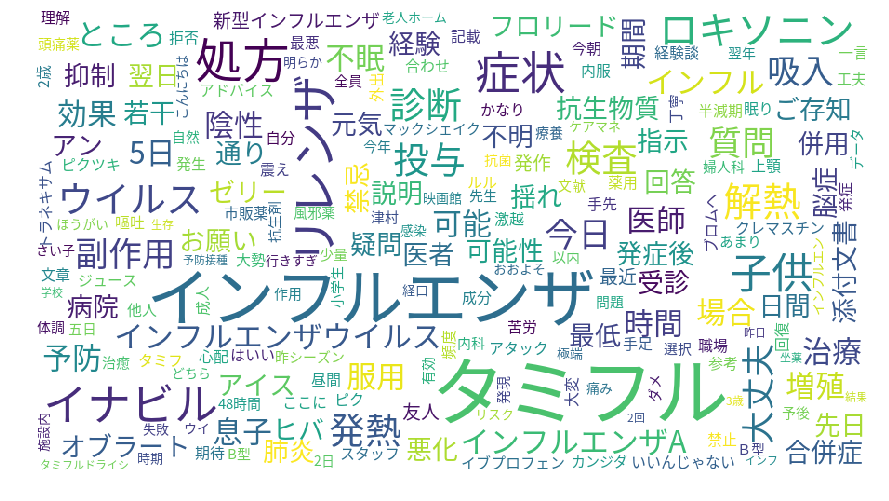

In [16]:
#Word Cloud生成
fpath = "/Users/samuel/Library/Fonts/NotoSansCJKjp-Regular.otf"

wordcloud = WordCloud(
    background_color="white",
    max_font_size=80,
    relative_scaling=.4,
    width=900,
    height=500,
    font_path=fpath,
    ).generate(str(tamifuru['word_refined']))
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# 1.2  frequency Bar Plot

In [17]:
# 単語集計函数
def wordcount(dic, items):
    for item in items:
        if item not in dic:
            dic[item] = 1
        else:
            dic[item]+=1
    return dic

In [18]:
word_count = reduce( lambda d, tokuns: wordcount(d, tokuns) , list(tamifuru.word_refined), dict())

In [20]:
#　Dataframeにし、ソートする
word_count_list = pd.DataFrame(list(word_count.items()), columns=['word','count'])
sorted_word_count_list = word_count_list.sort_values('count', ascending=False)

In [21]:
sorted_word_count_list

,word,count
0,タミフル,1589
50,インフルエンザ,889
4,処方,439
65,服用,382
35,ウイルス,283
6,症状,272
25,副作用,271
151,病院,258
463,効果,225
437,異常,202


Text(0.5, 1.0, '頻度表')

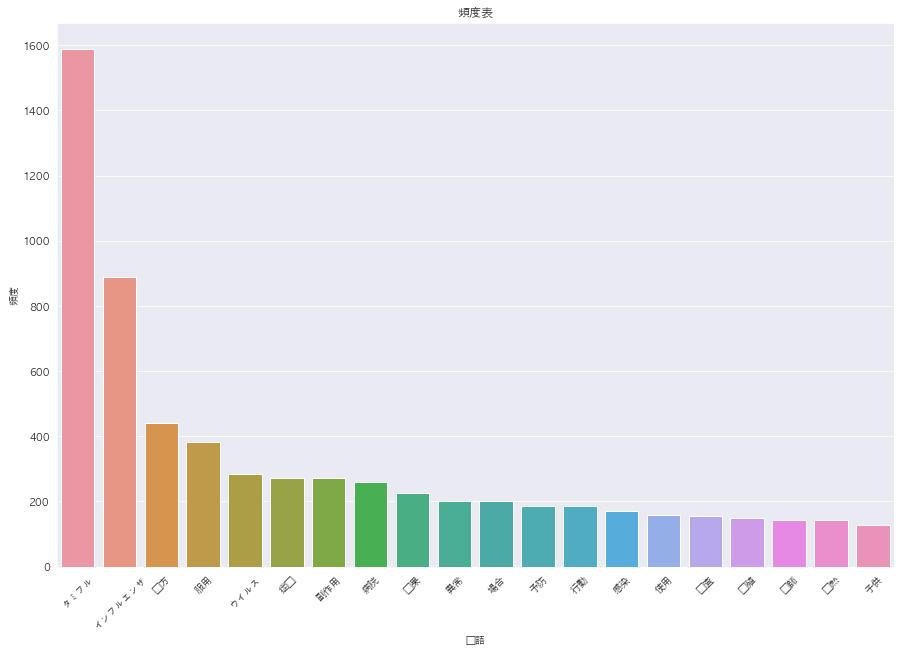

In [22]:
# Bar plot生成
plt.figure(figsize=(15,10))
sns.barplot(x=(sorted_word_count_list['word'])[0:20], y=(sorted_word_count_list['count'])[0:20])
plt.xticks(rotation= 45)
plt.xlabel('単語')
plt.ylabel('頻度')
plt.title('頻度表')